In [154]:
import gym
import gym_pomdp
import numpy as np
import pandas as pd
import math, random
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import EpsGreedyQPolicy
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
env = gym.make('Tiger-v0')

In [133]:
def agent(states, actions):
    model = Sequential()
    model.add(Dense(24, input_shape=(env.observation_space.n,), activation="relu"))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(env.action_space.n, activation="linear"))
    return model
model = agent(env.observation_space.n, env.action_space.n)

In [141]:
memory = SequentialMemory(limit=50000, window_length=3)

In [142]:
dqn = DQNAgent(model, policy= EpsGreedyQPolicy(), test_policy=None, enable_double_dqn=True, enable_dueling_network=True, dueling_type='avg', nb_actions = env.action_space.n, memory=memory)

In [143]:
dqn.compile(optimizer=Adam(lr=0.001))

In [152]:
dqn.fit(env, nb_steps = 500000, visualize = False, verbose = 1)

Training for 500000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 131s 13ms/step - reward: 1.2584
554 episodes - episode_reward: 22.623 [-25.000, 230.000] - loss: 31.480 - mean_q: 24.350 - state: 0.456

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 140s 14ms/step - reward: 0.9100
423 episodes - episode_reward: 21.444 [-31.000, 330.000] - loss: 32.757 - mean_q: 25.284 - state: 0.495

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 153s 15ms/step - reward: 1.0300
537 episodes - episode_reward: 19.246 [-25.000, 235.000] - loss: 33.928 - mean_q: 26.023 - state: 0.481

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 137s 14ms/step - reward: 1.1107
476 episodes - episode_reward: 23.101 [-27.000, 363.000] - loss: 37.282 - mean_q: 27.221 - state: 0.489

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 145s 15ms/step -

In [156]:
scores = dqn.test(env, nb_episodes = 100, visualize= False)
print('Average score over 100 test games:{}'.format(np.mean(scores.history['episode_reward'])))

Testing for 100 episodes ...
Episode 1: reward: 276.000, steps: 167
Episode 2: reward: 220.000, steps: 135
Episode 3: reward: 270.000, steps: 151
Episode 4: reward: 44.000, steps: 58
Episode 5: reward: 169.000, steps: 120
Episode 6: reward: 213.000, steps: 142
Episode 7: reward: 28.000, steps: 30
Episode 8: reward: 256.000, steps: 165
Episode 9: reward: 322.000, steps: 231
Episode 10: reward: -1.000, steps: 15
Episode 11: reward: 16.000, steps: 20
Episode 12: reward: 36.000, steps: 44
Episode 13: reward: 49.000, steps: 53
Episode 14: reward: 156.000, steps: 122
Episode 15: reward: 56.000, steps: 57
Episode 16: reward: 177.000, steps: 123
Episode 17: reward: 990.000, steps: 564
Episode 18: reward: 443.000, steps: 286
Episode 19: reward: 108.000, steps: 60
Episode 20: reward: 17.000, steps: 30
Episode 21: reward: 488.000, steps: 285
Episode 22: reward: 93.000, steps: 86
Episode 23: reward: 533.000, steps: 328
Episode 24: reward: 51.000, steps: 84
Episode 25: reward: 428.000, steps: 268
E

In [157]:
df=pd.DataFrame.from_dict(scores.history)

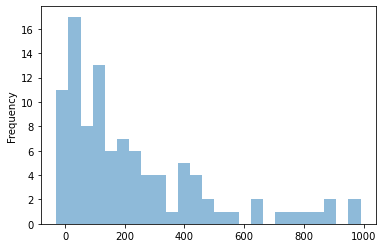

In [158]:
ax = df['episode_reward'].plot.hist(bins=25, alpha=0.5)